# The Nuclear Electronic Orbital Method in a Quantum Computer Framework

The nuclear electronic orbital (NEO) method allows the study of chemical problems beyond the Born-Oppenheimer approximation by treating some protons as quantum mechanical entities. This is accomplished by including terms in the Hamiltonian that describe the physics of the protons, while harnessing the quantum mechanical formalism/machinery routinely used for electronic structure. This applied example covers the [NEO Hartree-Fock method](https://manual.q-chem.com/5.3/Ch13.S4.SS1.html). 

## Library Installations

In [1]:
!pip install qiskit[all]
!pip install pyscf
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.0/399.0 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 17.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 72.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-experiments 0.4.0 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


# Application: NEO-VQE

Steps:

* Read integrals
* Second quantization
* Qubit mapping

### The NEO Method

The NEO-HF wavefunction is a product of the electronic and protonic wavefunction:

\begin{align*}
    \Psi _{\text{NEO-HF}} (\chi _e, \chi _p) = \Phi _{e} (\chi _e) \Phi _{p} (\chi _p) 
\end{align*}

Within the restricted NEO Hartree-Fock formalism the energy can be calculated:
\begin{multline*}
    E_{\text{NEO-HF}} = 
    2\sum_{i}^{N_{\text{e}}/2}h^{\text{e}}_{ii}+\sum_{i}^{N_{\text{e}}/2}\sum_{j}^{N_{\text{e}}/2}\Big{(}2(ii|jj)-(ij|ij)\Big{)} \\
    +\sum_{I}^{N_{\text{p}}}h^{\text{p}}_{II}+\frac{1}{2}\sum_{I}^{N_
{\text{p}}}\sum_{J}^{N_{\text{p}}}\Big{(}(II|JJ)-(IJ|IJ)\Big{)}-2\sum_{i}^{N_{\text{e}}/2}\sum_{I}^{N_{\text{p}}}(ii|II)
\end{multline*}

where $i,j$ denote electronic orbitals and $I,J$ denote nuclear orbitals.

Basis representation of electronic/protonic orbitals.
\begin{align*}
    \psi _{i} ^{e} = \sum _{\mu}^{N_e^{basis}} C _{\mu i}^{e} \phi _{\mu}^{e}(\mathbf{r}_e) \; ; \;
    \psi _{I} ^{p} = \sum _{\mu'}^{N_p^{basis}} C _{\mu ' I}^{p} \phi _{\mu'}^{p}(\mathbf{r}_p)
\end{align*}

The Hartree-Fock-Roothaan NEO equations are solved iteratively via a SCF procedure:
\begin{align*}
    \mathbf{F}^e\mathbf{C}^e = \mathbf{S}^e\mathbf{C}^e\mathbf{E}^e \; ; \;
    \mathbf{F}^p\mathbf{C}^p = \mathbf{S}^p\mathbf{C}^p\mathbf{E}^p
\end{align*}

The Fock matrix elements, for each iteration, contain mixed electronic-protonic terms:

\begin{align*}
    \mathbf{F}^e_{\mu \nu} &= h ^e_{\mu \nu} + \sum _{\rho \lambda} P ^e_{\lambda \rho} \Big( (\mu \nu| \rho \lambda) - \dfrac{1}{2}(\mu \lambda | \rho \nu) \Big) - \sum _{\mu' \nu'}P ^p_{\mu' \nu'} (\mu \nu|\mu' \nu') \\
    \mathbf{F}^p_{\mu \nu} &= h ^p_{\mu' \nu'} + \sum _{\rho' \lambda'} P ^p_{\lambda' \rho'} \Big( (\mu' \nu'| \rho' \lambda') - (\mu' \lambda' | \rho' \nu') \Big) - \sum _{\mu \nu}P ^e_{\mu \nu} (\mu' \nu'|\mu \nu)
\end{align*}

These integral elements can be calculated using standard electronic structure software packages/integrals libraries. For the purpose of this tutorial the terms are provided in a companion text file.

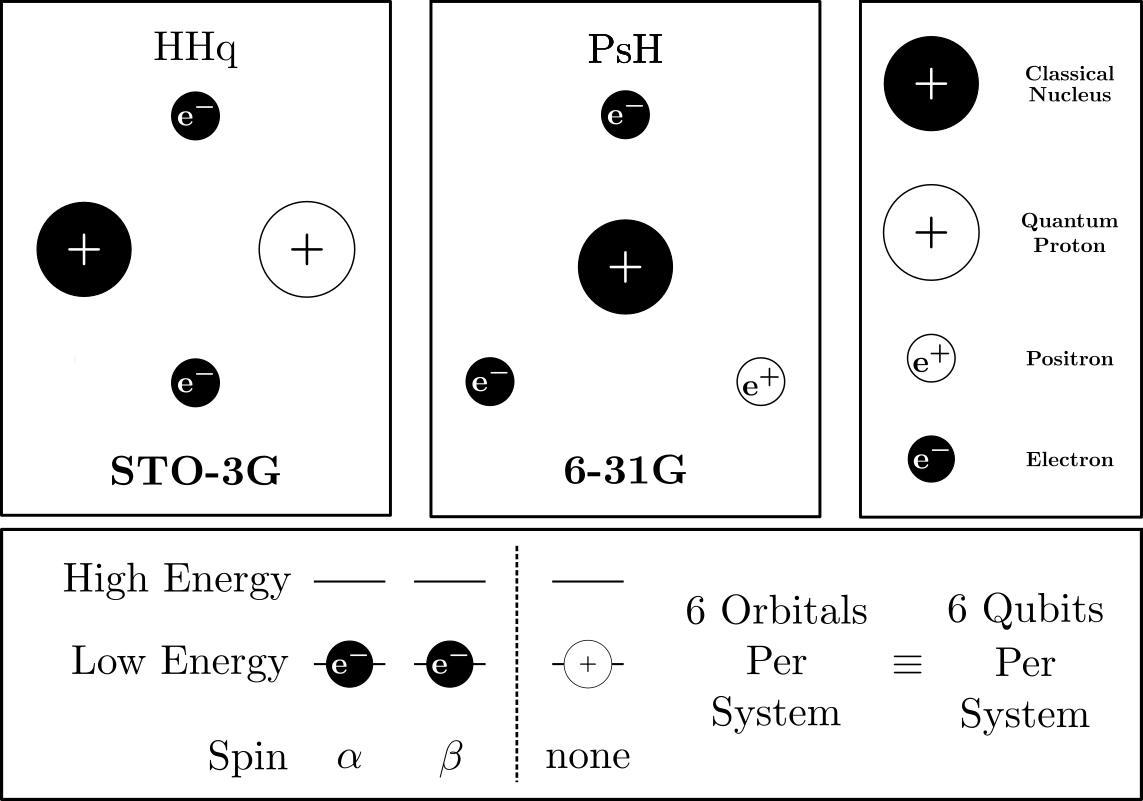

### Integral Reading


#### Description/Background

This notebook implements the Variational Quantum Eigensolver (VQE) using the multicomponent-Unitary Coupled Cluster (mcUCC) ansatz as introduced by Pavošević and Hammes-Schiffer in
[this paper](https://doi.org/10.1021/acs.jctc.1c00220) and seeks to build upon the original authors' methods by directly implementing these methods on a quantum computer. 

Although the Unitary Coupled Cluster ansatz has proven to be effective for many molecules **within the Born-Oppenheimer Approximation** (where electrons are treated quantum mechanically and nuclei are treated classically as a result of their mass being orders of magnitude larger), there are systems where this approximation is not valid. We will illustrate this with the two model systems utilized in the original publication: 

- $H_2$

- Positronium Hydride



#### Preliminary Codes

In [4]:
from qiskit import Aer, BasicAer
from qiskit.opflow import PauliExpectation, PauliTrotterEvolution, Suzuki, StateFn, PauliOp, X, Y, Z, I, One, Zero, VectorStateFn, CircuitStateFn, MatrixOp
from qiskit.circuit import ParameterVector
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, L_BFGS_B
from qiskit.utils import QuantumInstance
from qiskit.quantum_info import Statevector, Operator
import numpy.linalg as LA
import numpy as np
# from qiskit_nature.circuit.library import UCCSD # Not currently used, but provides a streamlined class for generating a UCCSD ansatz.

# Dictionary that maps the string form of the Pauli Matrices to the Qiskit `PauliOps`
string2pauli = {'I': I, 'X': X, 'Y': Y, 'Z': Z}

# Begin Functions: 
def vec_query(arr, my_dict):
    '''
    This is a utility function that allows us to query a dict (i.e.; `my_dict`) 
    with a numpy array of keys. 
        Example Usage: Turn a Pauli String into a string of Pauli Matrices as recognized by Qiskit.
        init_string = ['I', 'X', 'Y', 'Z']
        out_string = vec_query(init_string, string2pauli)
    '''
    return np.vectorize(my_dict.__getitem__)(arr)



def construct_cluster_op(lead_term = 1):
    '''
    This function constructs a parameterized mc-UCCSD(T) ansatz.
    '''
    # Define our parameter vector corresponding to our t-amplitudes (reference Eqn. #)
    taus = ParameterVector('t_amps', length=5)

    # Electronic Double Excitations
    tau2_ee_JW = 0.125*lead_term*taus[0]*((-1. *  (X ^ X ^ X ^ Y ^ I ^ I)).eval() + (-1. * (X ^ X ^ Y ^ X ^ I ^ I)).eval() +
                                                   (X ^ Y ^ X ^ X ^ I ^ I).eval() + (-1. * (X ^ Y ^ Y ^ Y  ^ I ^ I)).eval() + 
                                                    (Y ^ X ^ X^ X ^ I ^ I).eval() + (-1. * (Y ^ X ^ Y ^ Y ^ I ^ I)).eval() + 
                                                   (Y ^ Y ^ X ^ Y ^ I ^ I).eval() + (Y ^ Y ^ Y ^ X ^ I ^ I ).eval())
    # Single Electronic Excitations 
    tau1_e_JW = 0.5*lead_term*taus[1]*((-1. * (X ^ Z ^ Y ^ I ^ I ^ I )).eval() + (Y ^ Z ^ X ^ I ^ I ^ I).eval() + 
                                        (- 1. * (I ^ X ^ Z ^ Y ^ I ^ I )).eval() + (I ^ Y ^ Z ^ X ^ I ^ I).eval())
    # Double Mixed Electronic-Protonic Excitations 
    tau2_ep_JW = 0.125* lead_term*taus[2]* ((X ^ Z ^ X ^ I ^ X ^ Y).eval() - (X ^ Z ^ X ^ I ^ Y ^ X).eval() +
                                            (X ^ Z ^ Y ^ I ^ X ^ X).eval() + (X ^ Z ^ Y ^ I ^ Y ^ Y).eval() - 
                                            (Y ^ Z ^ X ^ I ^ X ^ X).eval() + (Y ^ Z ^ X ^ I ^ Y ^ Y).eval() + 
                                            (Y ^ Z ^ Y ^ I ^ X ^ Y).eval() - (Y ^ Z ^ Y ^ I ^ Y ^ X).eval() +
                                            (I ^ X ^ Z ^ X ^ X ^ Y).eval() - (I ^ X ^ Z ^ X ^ Y ^ X).eval() +
                                            (I ^ X ^ Z ^ Y ^ X ^ X).eval() + (I ^ X ^ Z ^ Y ^ Y ^ Y).eval() -
                                            (I ^ Y ^ Z ^ X ^ X ^ X).eval() - (I ^ Y ^ Z ^ X ^ Y ^ Y).eval() + 
                                            (I ^ Y ^ Z ^ Y ^ X ^ Y).eval() - (I ^ Y ^ Z ^ Y ^ Y ^ X).eval())
    # Single Protonic Excitations
    tau1_p_JW = 0.5*lead_term*taus[3]*((I ^ I ^ I ^ I ^ X ^ Y).eval() - (I ^ I ^ I ^ I ^ Y ^ X).eval())
    # Triple Mixed Electronic-Protonic Excitations
    tau3_eep_JW = 0.03125*lead_term*taus[4]*((-1.*(X ^ X ^ X ^ X ^ X ^ Y)).eval() + (X ^ X ^ X ^ X ^ Y ^ X).eval() -
                                                 (X ^ X ^ X ^ Y ^ X ^ X).eval() - (X ^ X ^ X ^ Y ^ Y ^ Y).eval() -
                                                 (X ^ X ^ Y ^ X ^ X ^ X).eval() - (X ^ X ^ Y ^ X ^ Y ^ Y).eval() +
                                                 (X ^ X ^ Y ^ Y ^ X ^ Y).eval() - (X ^ X ^ Y ^ Y ^ Y ^ X).eval() +
                                                 (X ^ Y ^ X ^ X ^ X ^ X).eval() + (X ^ Y ^ X ^ X ^ Y ^ Y).eval() -
                                                 (X ^ Y ^ X ^ Y ^ X ^ Y).eval() + (X ^ Y ^ X ^ Y ^ Y ^ X).eval() -
                                                 (X ^ Y ^ Y ^ X ^ X ^ Y).eval() + (X ^ Y ^ Y ^ X ^ Y ^ X).eval() -
                                                 (X ^ Y ^ Y ^ Y ^ X ^ X).eval() - (X ^ Y ^ Y ^ Y ^ Y ^ Y).eval() +
                                                 (Y ^ X ^ X ^ X ^ X ^ X).eval() + (Y ^ X ^ X ^ X ^ Y ^ Y).eval() -
                                                 (Y ^ X ^ X ^ Y ^ X ^ Y).eval() + (Y ^ X ^ X ^ Y ^ Y ^ X).eval() -
                                                 (Y ^ X ^ Y ^ X ^ X ^ Y).eval() + (Y ^ X ^ Y ^ X ^ Y ^ X).eval() -
                                                 (Y ^ X ^ Y ^ Y ^ X ^ X).eval() - (Y ^ X ^ Y ^ Y ^ Y ^ Y).eval() -
                                                 (Y ^ Y ^ X ^ X ^ X ^ Y).eval() - (Y ^ Y ^ X ^ X ^ Y ^ X).eval() +
                                                 (Y ^ Y ^ X ^ Y ^ X ^ X).eval() + (Y ^ Y ^ X ^ Y ^ Y ^ Y).eval() +
                                                 (Y ^ Y ^ Y ^ X ^ X ^ X).eval() + (Y ^ Y ^ Y ^ X ^ Y ^ Y).eval() -
                                                 (Y ^ Y ^ Y ^ Y ^ X ^ Y).eval() + (Y ^ Y ^ Y ^ Y ^ Y ^ X).eval())
    cluster_terms = tau2_ee_JW + tau1_e_JW + tau2_ep_JW + tau1_p_JW + tau3_eep_JW
    cluster_op = cluster_terms.exp_i()
    return cluster_op 


def bind_operator_params(operator_name, values):
    '''
    Utility function to bind values of a parameterized operator.
    '''
    n_params = len(operator_name.parameters)
    operator_name.bind_parameters(dict(zip(operator_name.parameters, values)))
    return operator_name

np.set_printoptions(suppress=True)

NEO_Ham = ((0.08050183366921762)   * (I ^  I ^  I ^  I ^  I ^  I) 
        + (-0.04516478087448256)  * (X ^  X ^  Y ^  Y ^  I ^  I) 
        + (0.04516478087448256)   * (X ^  Y ^  Y ^  X ^  I ^  I) 
        + (0.028238626330481964)  * (X ^  Z ^  X ^  I ^  I ^  I) 
        + (-0.002433078613602)    * (X ^  Z ^  X ^  Z ^  I ^  I) 
        + (-0.001085353956284875) * (X ^  Z ^  X ^  I ^  X ^  X) 
        + (-0.001085353956284875) * (X ^  Z ^  X ^  I ^  Y ^  Y) 
        + (0.08610133233766938)   * (X ^  Z ^  X ^  I ^  Z ^  I) 
        + (0.06289875071602763)   * (X ^  Z ^  X ^  I ^  I ^  Z) 
        + (0.002602966095228563)  * (X ^  I ^  X ^  I ^  I ^  I) 
        + (0.04516478087448256)   * (Y ^  X ^  X ^  Y ^  I ^  I) 
        + (-0.04516478087448256)  * (Y ^  Y ^  X ^  X ^  I ^  I) 
        + (0.028238626330481964)  * (Y ^  Z ^  Y ^  I ^  I ^  I) 
        + (-0.002433078613602)    * (Y ^  Z ^  Y ^  Z ^  I ^  I) 
        + (-0.001085353956284875) * (Y ^  Z ^  Y ^  I ^  X ^  X) 
        + (-0.001085353956284875) * (Y ^  Z ^  Y ^  I ^  Y ^  Y) 
        + (0.08610133233766938)   * (Y ^  Z ^  Y ^  I ^  Z ^  I) 
        + (0.06289875071602763)   * (Y ^  Z ^  Y ^  I ^  I ^  Z) 
        + (0.002602966095228563)  * (Y ^  I ^  Y ^  I ^  I ^  I) 
        + (0.14194074833434972)   * (Z ^  I ^  I ^  I ^  I ^  I) 
        + (0.002602966095228563)  * (Z ^  X ^  Z ^  X ^  I ^  I) 
        + (0.002602966095228563)  * (Z ^  Y ^  Z ^  Y ^  I ^  I) 
        + (0.168803262630486)     * (Z ^  Z ^  I ^  I ^  I ^  I) 
        + (0.12057651604485276)   * (Z ^  I ^  Z ^  I ^  I ^  I) 
        + (0.16574129691933526)   * (Z ^  I ^  I ^  Z ^  I ^  I) 
        + (0.00061548930662275)   * (Z ^  I ^  I ^  I ^  X ^  X) 
        + (0.00061548930662275)   * (Z ^  I ^  I ^  I ^  Y ^  Y) 
        + (-0.220267448058864)    * (Z ^  I ^  I ^  I ^  Z ^  I) 
        + (-0.20280478223967474)  * (Z ^  I ^  I ^  I ^  I ^  Z) 
        + (0.028238626330481964)  * (I ^  X ^  Z ^  X ^  I ^  I) 
        + (-0.001085353956284875) * (I ^  X ^  Z ^  X ^  X ^  X) 
        + (-0.001085353956284875) * (I ^  X ^  Z ^  X ^  Y ^  Y) 
        + (0.08610133233766938)   * (I ^  X ^  Z ^  X ^  Z ^  I) 
        + (0.06289875071602763)   * (I ^  X ^  Z ^  X ^  I ^  Z) 
        + (-0.002433078613602)    * (I ^  X ^  I ^  X ^  I ^  I) 
        + (0.028238626330481964)  * (I ^  Y ^  Z ^  Y ^  I ^  I) 
        + (-0.001085353956284875) * (I ^  Y ^  Z ^  Y ^  X ^  X) 
        + (-0.001085353956284875) * (I ^  Y ^  Z ^  Y ^  Y ^  Y) 
        + (0.08610133233766938)   * (I ^  Y ^  Z ^  Y ^  Z ^  I) 
        + (0.06289875071602763)   * (I ^  Y ^  Z ^  Y ^  I ^  Z) 
        + (-0.002433078613602)    * (I ^  Y ^  I ^  Y ^  I ^  I) 
        + (0.14194074833434972)   * (I ^  Z ^  I ^  I ^  I ^  I) 
        + (0.16574129691933526)   * (I ^  Z ^  Z ^  I ^  I ^  I) 
        + (0.12057651604485276)   * (I ^  Z ^  I ^  Z ^  I ^  I) 
        + (0.00061548930662275)   * (I ^  Z ^  I ^  I ^  X ^  X) 
        + (0.00061548930662275)   * (I ^  Z ^  I ^  I ^  Y ^  Y) 
        + (-0.220267448058864)    * (I ^  Z ^  I ^  I ^  Z ^  I) 
        + (-0.20280478223967474)  * (I ^  Z ^  I ^  I ^  I ^  Z) 
        + (-0.2791676157167482)   * (I ^  I ^  Z ^  I ^  I ^  I) 
        + (0.17451848726278274)   * (I ^  I ^  Z ^  Z ^  I ^  I) 
        + (0.00171166584424575)   * (I ^  I ^  Z ^  I ^  X ^  X) 
        + (0.00171166584424575)   * (I ^  I ^  Z ^  I ^  Y ^  Y) 
        + (-0.244952026082031)    * (I ^  I ^  Z ^  I ^  Z ^  I) 
        + (-0.2129541339465055)   * (I ^  I ^  Z ^  I ^  I ^  Z) 
        + (-0.2791676157167481)   * (I ^  I ^  I ^  Z ^  I ^  I) 
        + (0.00171166584424575)   * (I ^  I ^  I ^  Z ^  X ^  X) 
        + (0.00171166584424575)   * (I ^  I ^  I ^  Z ^  Y ^  Y) 
        + (-0.244952026082031)    * (I ^  I ^  I ^  Z ^  Z ^  I) 
        + (-0.2129541339465055)   * (I ^  I ^  I ^  Z ^  I ^  Z) 
        + (-0.0021923530752455)   * (I ^  I ^  I ^  I ^  X ^  X) 
        + (-0.0021923530752455)   * (I ^  I ^  I ^  I ^  Y ^  Y) 
        + (0.5687811831182695)    * (I ^  I ^  I ^  I ^  Z ^  I) 
        + (0.47117012280981496)   * (I ^  I ^  I ^  I ^  I ^  Z))


First, we should define our initial state/guess wavefunction. This is the so-called multicomponent Hartree-Fock Wavefunction: 

$$ \left| \Psi_{\textrm{HF}} \right \rangle = \left| \psi_{e} \right \rangle \left| \psi_{p} \right \rangle $$ 

In [5]:
def get_mcHF_initial_state():
    '''
    This is a utility function to generate the multicomponent-Hartree Fock Wavefunction
    '''
    # Definition of the multicomponent Hartree-Fock State (mcHF):
    # Initial Electronic Wavefunction (Electronic Slater Determinant):
    psi0e = One ^ One ^ Zero ^ Zero
    # Initial Protonic Wavefunction (Protonic Slater Determinant):
    psi0p = One ^ Zero
    # Construct the wavefunction from the tensor produce of the electronic and protonic components.
    mc_HF = psi0e ^ psi0p
    # Define it as a `qiskit.VectorStateFn` Object - 
    # this is needed for us to apply the UCC operator later
    init_state = VectorStateFn(mc_HF.to_matrix())
    return init_state

In [19]:
psi0 = get_mcHF_initial_state() # Generate the initial wavefunction. 
print(psi0)
# Statevector(psi0.to_matrix()).draw('latex') # Here we're just showing the ket for the mc-HF wavefunction.

VectorStateFn(Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2, 2, 2, 2)))


In [21]:
# Take our Hamiltonian (defined in the J-W Basis above)
new_ham = NEO_Ham


With the initial wavefunction and our Hamiltonian, we can get the energy of our initial guess (i.e., mc-Hartree Fock Energy) by computing the expectation value: $$ E_{mcHF} = \left\langle \psi_{mcHF} \middle| H \middle| \psi_{mcHF} \right \rangle $$ 

In [22]:
# Calculate the HF Energy by computing the expectation value: <psi | H | psi>
HF_energy = Statevector(psi0.to_matrix()).expectation_value(new_ham)
fabijan_HF_en = -1.059569378143867
print("HF Energy:\t{}\nDifference from reported HF Energy:\t{}".format(np.real(HF_energy), 
                                                                                 np.real(HF_energy-fabijan_HF_en)))

HF Energy:	-1.0595693781438675
Difference from reported HF Energy:	-4.440892098500626e-16


In [23]:
# Construct the parameterized UCC operator/propagator in the JW basis:
cluster_prop = construct_cluster_op(lead_term=1.0)
# Now we need to convert the circuit so its actually recognizeably by a QC: 
# Trotterize the cluster propagator: 
trotterized_clust = PauliTrotterEvolution(trotter_mode=Suzuki(order=1, reps=1)).convert(cluster_prop)
# We have to initialize our t-amplitudes (the parameterized amplitudes of the terms in the cluster expansion)
bound_trotter_clust = bind_operator_params(trotterized_clust, [0.0]*5)
# Reduce the expression 
cluster_circuit = bound_trotter_clust.reduce()
# Now we will generate our ansatz/variational form by applying 
# the cluster propagator to the initial state and generate its circuit.
var_form = (cluster_circuit.compose(psi0)).to_circuit()
# Restrict the bounds of the t-amplitudes to be within the range of {-0.5, 0.5}:
var_form.parameter_bounds = [[-0.5, 0.5]]*5

Now we will set-up and run our VQE Run! Note that you can find explanations of the optional arguments [here](https://qiskit.org/documentation/stubs/qiskit.algorithms.VQE.html): 

In [24]:
#------------------------- Parameters for Classical Optimizer -------------------------#
max_funk = 2500 # Maximum Number of Function Executions
max_iterations = 2000 # Maximum Number of VQE Iterations
# Now we define our classical optimizer
optim_bfgs = L_BFGS_B(maxfun=max_funk, maxiter=max_iterations, max_evals_grouped=1)
#------------------------- Initialize the Backend Configuration for Circuit Execution -------------------------# 
backend = BasicAer.get_backend('statevector_simulator')
#------------------------- Construct a QuantumInstance for our QuantumCircuit Simulator -------------------------# 
qi = QuantumInstance(backend, seed_simulator=5, seed_transpiler=5)
#------------------------- Construct a VQE Instance -------------------------#
vqe = VQE(ansatz = var_form, optimizer=optim_bfgs, quantum_instance=qi, expectation=PauliExpectation(group_paulis=True))#, callback=callback)
vqe.max_evals_grouped=1 # Maximum Number of Grouped Evaluations
# Actual Execution of the VQE Algorithm
result_vqe = vqe.compute_minimum_eigenvalue(new_ham)
fab_reference = -1.079434223671585 # Published reference value
vqe_en = result_vqe.eigenvalue.real # Our final VQE-optimized energy
print(f'VQE estimated the ground energy to be {vqe_en:.7}')
print(f"Delta from reference energy value is {(vqe_en - fab_reference):.7}")


VQE estimated the ground energy to be -1.079434
Delta from reference energy value is 4.241845e-07


In [25]:
print(result_vqe)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 78,
    'eigenstate': array([ 0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.        -0.j, -0.00059552+0.j, -0.10912666+0.j, -0.        -0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j, -0.00301571+0.j, -0.00222123+0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.00402267-0.j,  0.00221698-0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.   

In [26]:
vqe.ansatz.assign_parameters(result_vqe.optimal_point).decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().count_ops()

OrderedDict([('u', 965), ('cx', 534), ('r', 16)])

Let's see how this optimal VQE circuit will look on real hardware, we can do this by loading a `FakeProvider` backend: 

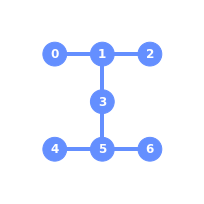

In [27]:
from qiskit.providers.fake_provider.backends import FakeCasablancaV2, FakeWashingtonV2, FakeNairobiV2
import qiskit.visualization as viz
# backend = FakeCasablancaV2()
# backend = FakeWashingtonV2()
backend = FakeNairobiV2()
# # backend.options.enable_truncation = False
viz.plot_gate_map(backend, figsize=(3.5, 3.5))



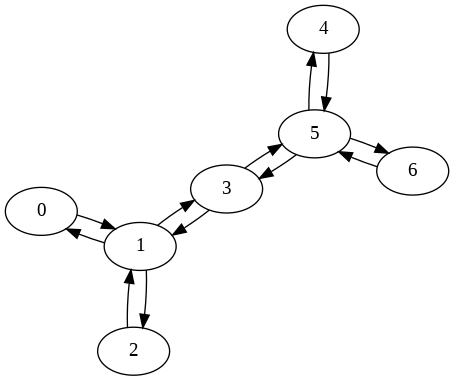

In [28]:
backend.coupling_map.draw()

In [29]:
# Construct the optimal circuit from the VQE Run above
vqe_optimal_circ = vqe.ansatz.assign_parameters(result_vqe.optimal_point)
# Initialize a QuantumInstance with a 'Fake Backend': 
qi = QuantumInstance(backend, seed_simulator=5, seed_transpiler=5)
# Transpile our optimal VQE Circuit with this new backend: 
transpiled_vqe = qi.transpile(vqe_optimal_circ )[0]

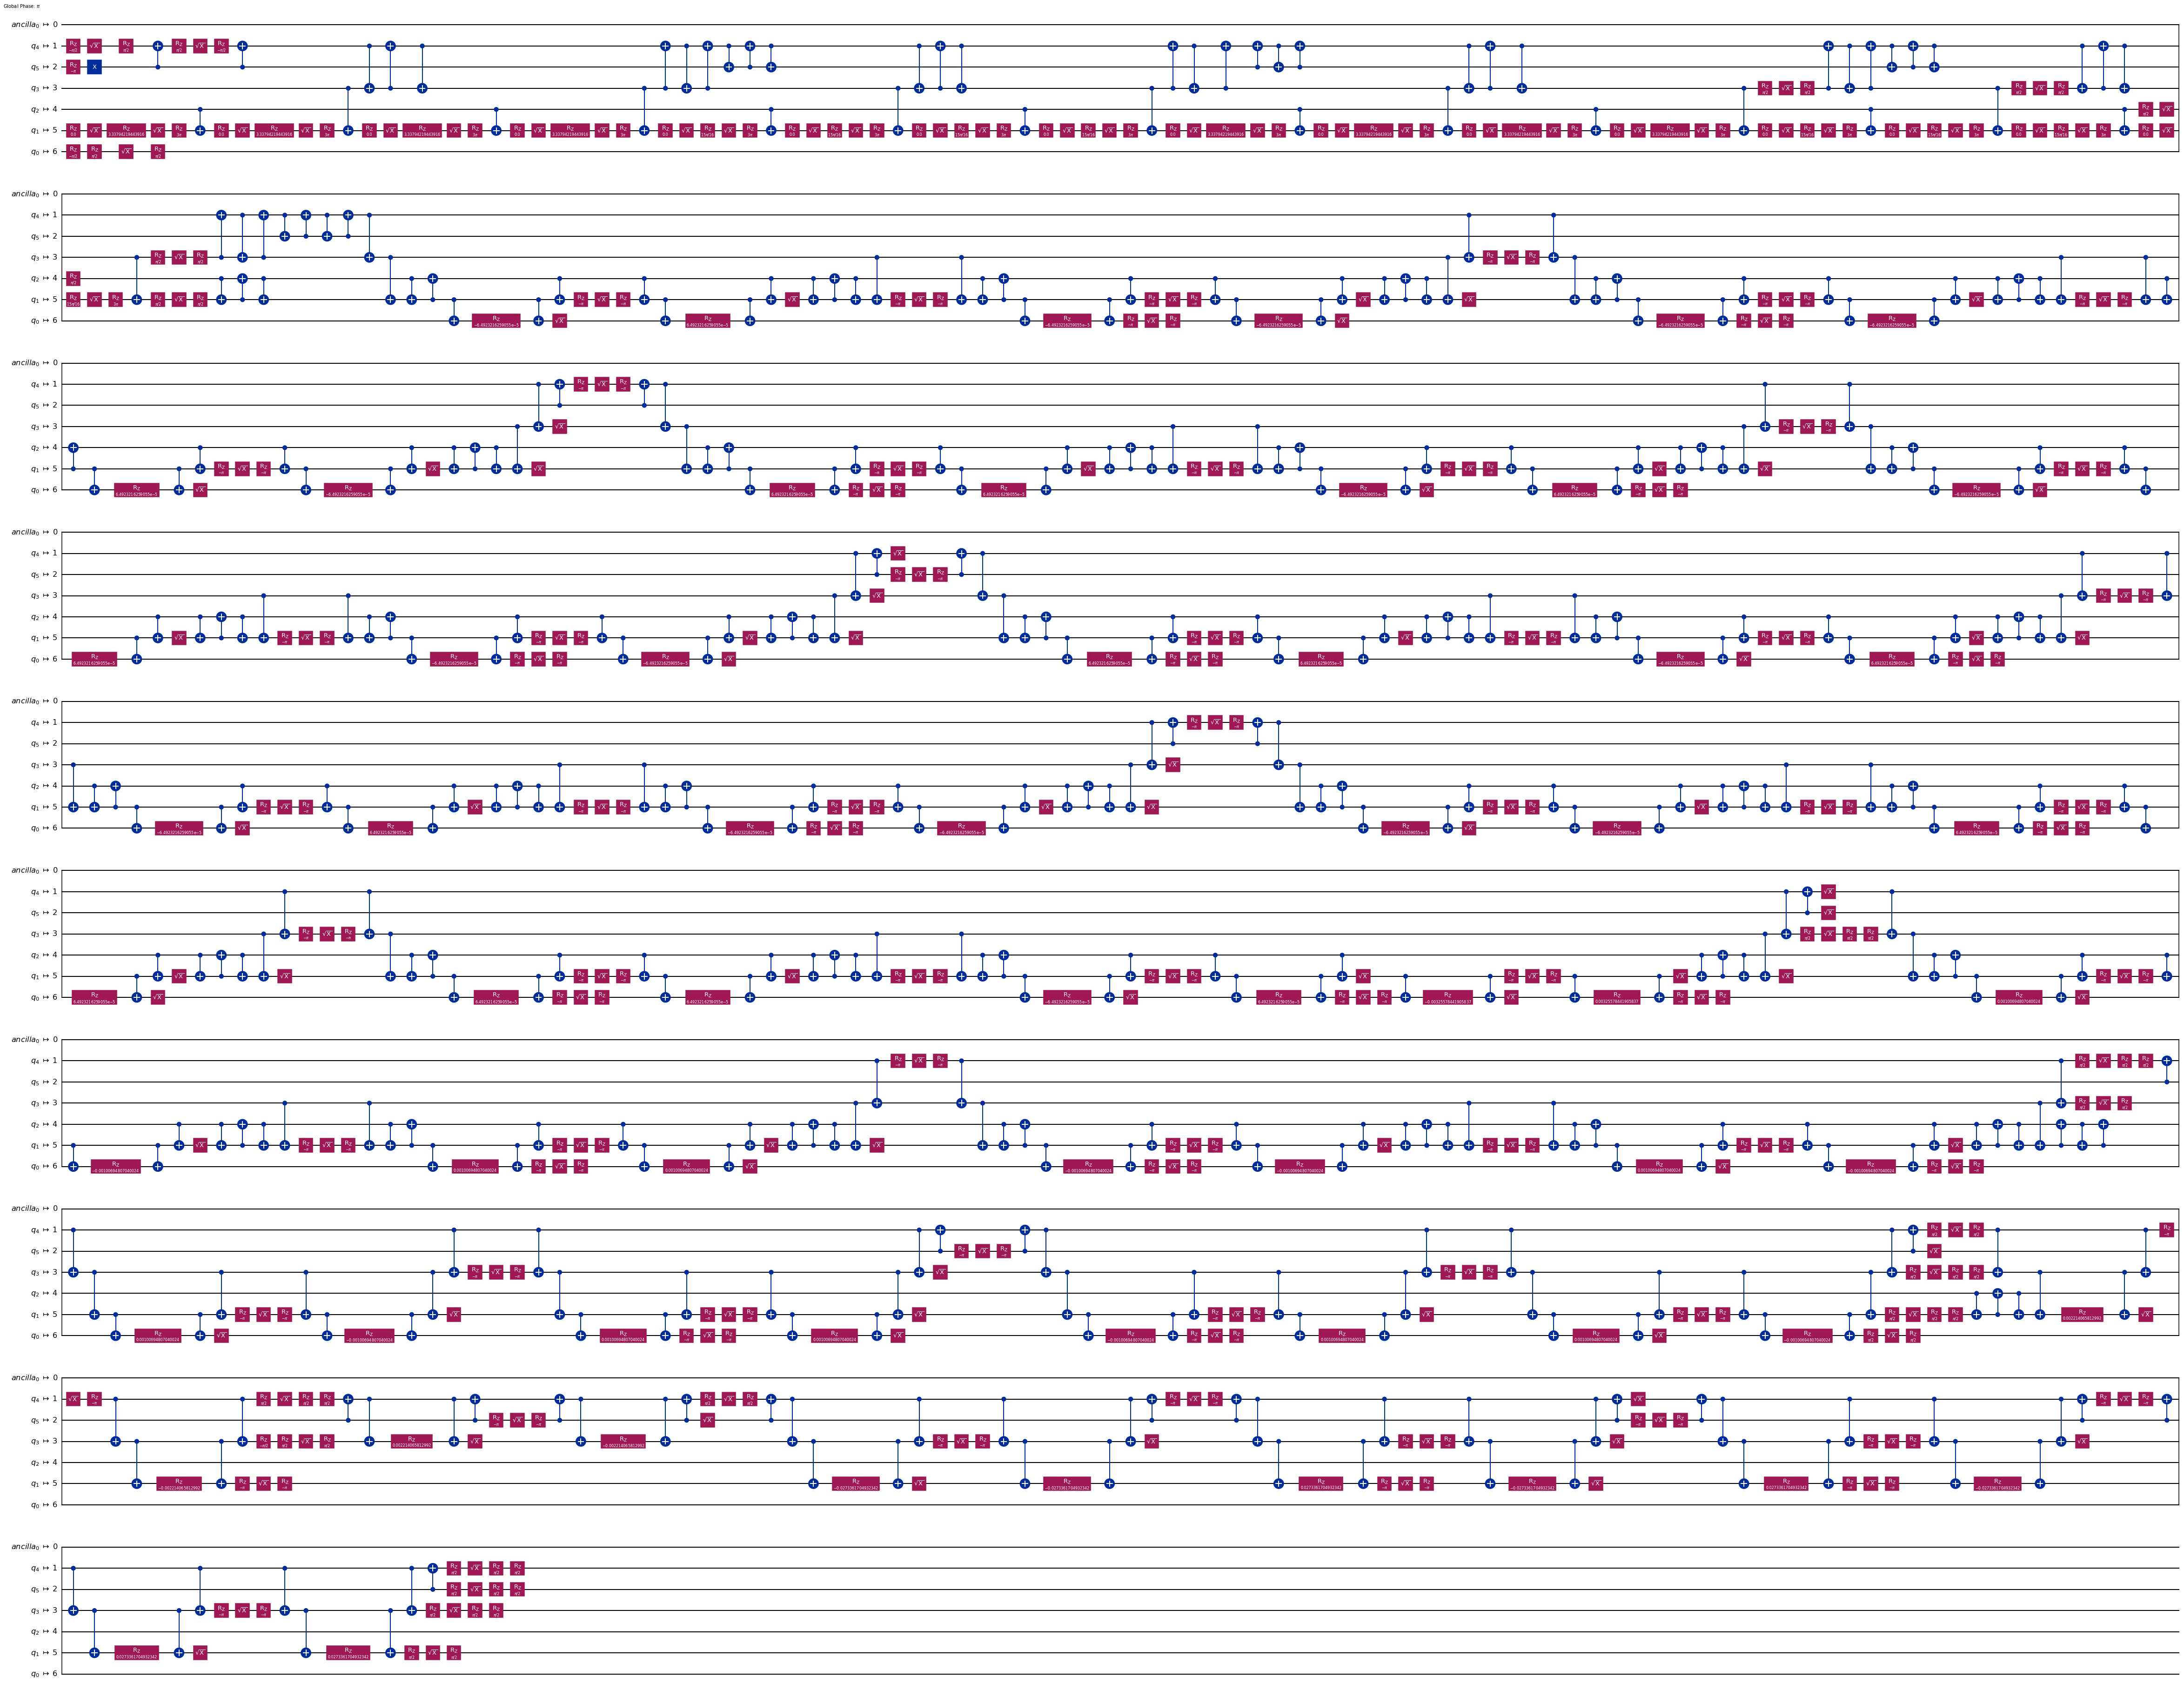

In [30]:
transpiled_vqe.draw('mpl', fold=100, style='iqx', filename='VQE_Circuit_0.pdf')

In [31]:
transpiled_vqe.count_ops() # FakeNairobi
transpiled_vqe.depth() # FakeNairobi

OrderedDict([('cx', 475), ('rz', 315), ('sx', 198), ('x', 1)])